In [97]:
import mols2grid
#import gdown
import os
import numpy as np
#os.chdir('/Users/kate_fieseler/PycharmProjects/postera/CAR_recipe')
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from IPython.display import display, Image
import time
import random
import pandas as pd
import csv
import sqlite3
import pickle
from sqlitedict import SqliteDict
import seaborn as sns
import csv
import ast
import sys
import arthorian_quest
from arthorian_quest import create

In [87]:
import sys
#sys.path.append("/Users/kate_fieseler/PycharmProjects/chemUtils")
import chemUtils
from chemUtils.substructure import splitExtendedMolBySubstruct

# STEP 1: Get all compounds ordered for D68

In [89]:
df = pd.read_csv("/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Meetings/asap/EV-D68_Design_Suggestions_(Responses)_ordered.csv")
df

AssertionError: Error, only one attachment point expected in grownMol

# STEP 2 (example): Run 1 of fragnet merge compounds through Manifold
Which compound? This one: C[C@@H]1CCC(=CC(=O)NCCN2CCCCC2)C1 first one on Fragalysis list

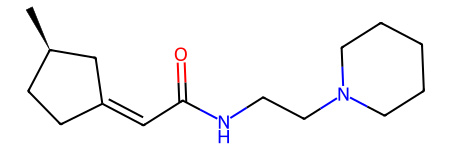

In [3]:
smiles = 'C[C@@H]1CCC(=CC(=O)NCCN2CCCCC2)C1'
m = Chem.MolFromSmiles(smiles)
m

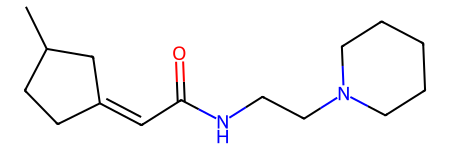

In [6]:
# Find this compound in df
smiles1 = 'CC1CCC(=CC(=O)NCCN2CCCCC2)C1'
m1 = Chem.MolFromSmiles(smiles1)
m1

In [11]:
# Turn into single csv
df1 = df[df['SMILES'] == smiles1]
df1.to_csv('fragnet_1_compound.csv', index=False)

In [13]:
# Input into Manifold
os.environ["MANIFOLD_API_KEY"] = "v1:mAOYT8fFItGktDWNvo35vw"
!python ../postera_retrosynthesis.py fragnet_1_compound.csv 0

  0%|                                                     | 0/1 [00:00<?, ?it/s]tmpdir: <TemporaryDirectory '/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmp94gy6d18'>
cache_working_name: /var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmp94gy6d18/cache_postera_retrosynthesisscaffold_restrict_diamond-mcule_ultimate-enamine_real-wuxi_bb_screening-sigma-generic-molport-emolecules-mcule-wuxi_galaxi-enamine_bb-enamine_made.sqlite
Number of entries in cache: 0
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 115.54it/s]
lauching query 0 (https://api.postera.ai/api/v1/retrosynthesis/)...
{'smiles': 'CC1CCC(=CC(=O)NCCN2CCCCC2)C1', 'maxSearchDepth': 4, 'catalogs': ['mcule_ultimate', 'enamine_real', 'wuxi_bb_screening', 'sigma', 'generic', 'molport', 'emolecules', 'mcule', 'wuxi_galaxi', 'enamine_bb', 'enamine_made'], 'reactionTag': 'diamond_robotic_synthesis'}
{'routes': [{'molecules': [{'smiles': 'CC1CCC(=CC(=O)NCCN2CCCCC2)C1', 'isBuildingBlock': True, 'catalogEntries

In [18]:
# For this compound, how many routes did we get?
!python ../CAR_recipe/cache_output.py

In [98]:
df = pd.read_csv('Libinvent_manifold_labelled.csv', index_col=0)
df

,SMILES,CAR_route,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock
0,CC1CCC(=CC(=O)NCCN2CCCCC2)C1,False,0,[],[],['CC1CCC(=CC(=O)NCCN2CCCCC2)C1'],['enamine_real']
1,CC1CCC(=CC(=O)NCCN2CCCCC2)C1,False,1,['Amidation'],"[('NCCN1CCCCC1', 'CC1CCC(=CC(=O)O)C1')]","[None, 'NCCN1CCCCC1', 'CC1CCC(=CC(=O)O)C1']","['molport', 'enamine_bb', 'enamine_real', 'gen..."
2,CC1CCC(=CC(=O)NCCN2CCCCC2)C1,False,2,"['Reductive amination', 'Amidation']","[('CC1CCC(=CC(=O)NCC=O)C1', 'C1CCNCC1'), ('NCC...","[None, None, 'NCC=O', 'CC1CCC(=CC(=O)O)C1', 'C...","['enamine_made', 'enamine_made', 'emolecules',..."


In [99]:
def get_reactants_from_tuple(reactants_tuple):
    reactants = []
    for reactant in reactants_tuple:
        reactants.append(reactant)
    return reactants

rxn_reactants = {}
i = 0
for row in df['reactants']:
    """
    Storing reactants in reactants column as mol objects in dictionary with key as rxn_name.
    """
    mols = []
    string = ast.literal_eval(row)
    if len(string) == 1: # 1 tuple
        reactants = get_reactants_from_tuple(string[0])
        for reactant in reactants:
            print(reactant)
            mols.append(Chem.MolFromSmiles(reactant))
    else:
        for reactant_tuples in string:
            reactants = get_reactants_from_tuple(reactant_tuples)
            for reactant in reactants:
                print(reactant)
                mols.append(Chem.MolFromSmiles(reactant))
    rxn_reactants[i] = mols
    i += 1
rxn_reactants

NCCN1CCCCC1
CC1CCC(=CC(=O)O)C1
CC1CCC(=CC(=O)NCC=O)C1
C1CCNCC1
NCC=O
CC1CCC(=CC(=O)O)C1


{0: [],
 1: [<rdkit.Chem.rdchem.Mol at 0x29071e0b0>,
 2: [<rdkit.Chem.rdchem.Mol at 0x2907f2510>,
  <rdkit.Chem.rdchem.Mol at 0x2907f2eb0>]}

In [100]:
# Draw reactants of first rxn, amidation
mols2grid.display(rxn_reactants[1], molsPerRow=4, subImgSize=(200, 200))

MolGridWidget()

TemplateNotFound: pages.html

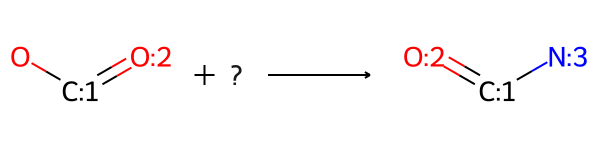

In [57]:
# SMARTS of amidation rxn
amidation_smarts = "[#6:1](=[#8:2])-[#8].[#7;H3,H2,H1:3]>>[#6:1](=[#8:2])-[#7:3]"
amidation = AllChem.ReactionFromSmarts(amidation_smarts)
amidation

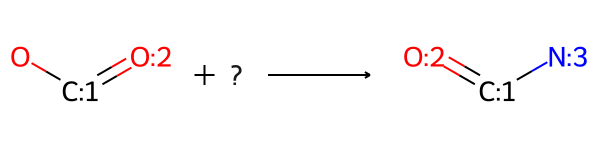

In [59]:
# SMARTS of amidation rxn turned around
amidation_smarts_turned_around = "[#7;H3,H2,H1:3].[#6:1](=[#8:2])-[#8]>>[#6:1](=[#8:2])-[#7:3]"
amidation_around = AllChem.ReactionFromSmarts(amidation_smarts)
amidation_around

In [101]:
# Try to use querimonate
smol: Chem.Mol = create.querimonate(Chem.MolFromSmiles('NCCN1CCCCC1'), {2: '[c,n]'})
Chem.MolToSmarts(smol)

'[N&H2]-[C&H2]-[c,n]-[N&H0]1-[C&H2]-[C&H2]-[C&H2]-[C&H2]-[C&H2]-1'